In [76]:
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
#original = pd.read_csv('data/algae.csv', index_col='date', sep=',', decimal='.', parse_dates=True, infer_datetime_format=True)
original = pd.read_csv('dataset1/pd_speech_features_copy1.csv', sep=',')



#Apagar as rows
#original = original.sort_values('id', ascending=True)
#original = original.drop_duplicates(subset='id', keep='last')


#FAzer a média das 3 medições
original = original.groupby('id').mean().reset_index()




sb_vars = original.select_dtypes(include='object')
original[sb_vars.columns] = original.select_dtypes(['object']).apply(lambda x: x.astype('category'))

cols_nr = original.select_dtypes(include='number')
cols_sb = original.select_dtypes(include='category')

#original1.describe(include='all')

original.describe(include='all')



,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.890329,0.500743,0.119996,0.066284,0.127195,93.227761,93.399366,0.001700,0.000534,0.002385,...,35.525687,25.893491,20.057960,16.069665,14.661894,13.354262,12.378443,11.523976,29.458776,0.436146
min,0.000000,0.000000,0.314347,0.555967,0.193853,88.666667,82.333333,0.003273,0.000014,0.000270,...,1.526233,1.579100,1.867967,2.203400,1.949200,2.079533,2.330300,2.283500,2.890800,0.000000
25%,62.750000,0.000000,0.691873,0.651182,0.393635,257.333333,256.333333,0.005082,0.000059,0.001078,...,2.820458,4.473508,4.436750,3.699583,3.380817,3.651750,4.897958,4.978075,5.056667,0.000000
50%,125.500000,1.000000,0.802037,0.699407,0.483117,317.333333,316.166667,0.006092,0.000103,0.001523,...,8.644883,10.489583,9.489333,6.323717,5.392867,6.909650,9.492500,10.598483,17.294033,1.000000
75%,188.250000,1.000000,0.823919,0.752511,0.575137,383.666667,382.166667,0.007510,0.000535,0.002617,...,38.554292,35.420017,26.345942,15.808783,14.024783,15.095608,23.127600,23.136125,57.496050,1.000000
max,251.000000,1.000000,0.869927,0.851113,0.826477,603.333333,596.000000,0.011608,0.002675,0.022580,...,187.323300,146.324000,107.571533,84.135067,66.894200,63.020433,56.747467,47.937033,94.838167,1.000000


In [77]:
#Missing Values Imputation
#(No missing values tho...)

from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='constant', fill_value=-1, missing_values=np.nan, copy=True)
imp.fit(original.values)
mat = imp.transform(original.values)
data = pd.DataFrame(mat, columns=original.columns)
data.describe(include='all')



,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.890329,0.500743,0.119996,0.066284,0.127195,93.227761,93.399366,0.001700,0.000534,0.002385,...,35.525687,25.893491,20.057960,16.069665,14.661894,13.354262,12.378443,11.523976,29.458776,0.436146
min,0.000000,0.000000,0.314347,0.555967,0.193853,88.666667,82.333333,0.003273,0.000014,0.000270,...,1.526233,1.579100,1.867967,2.203400,1.949200,2.079533,2.330300,2.283500,2.890800,0.000000
25%,62.750000,0.000000,0.691873,0.651182,0.393635,257.333333,256.333333,0.005082,0.000059,0.001078,...,2.820458,4.473508,4.436750,3.699583,3.380817,3.651750,4.897958,4.978075,5.056667,0.000000
50%,125.500000,1.000000,0.802037,0.699407,0.483117,317.333333,316.166667,0.006092,0.000103,0.001523,...,8.644883,10.489583,9.489333,6.323717,5.392867,6.909650,9.492500,10.598483,17.294033,1.000000
75%,188.250000,1.000000,0.823919,0.752511,0.575137,383.666667,382.166667,0.007510,0.000535,0.002617,...,38.554292,35.420017,26.345942,15.808783,14.024783,15.095608,23.127600,23.136125,57.496050,1.000000
max,251.000000,1.000000,0.869927,0.851113,0.826477,603.333333,596.000000,0.011608,0.002675,0.022580,...,187.323300,146.324000,107.571533,84.135067,66.894200,63.020433,56.747467,47.937033,94.838167,1.000000


In [78]:
#Normalization

from sklearn.preprocessing import Normalizer

try:
    imp_nr = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True)
    imp_sb = SimpleImputer(strategy='most_frequent', missing_values='', copy=True)
    df_nr = pd.DataFrame(imp_nr.fit_transform(cols_nr), columns=cols_nr.columns)
    df_sb = pd.DataFrame(imp_sb.fit_transform(cols_sb), columns=cols_sb.columns)

    data = df_nr.join(df_sb, how='right')
    data.describe(include='all')

    transf = Normalizer().fit(df_nr)
    df_nr = pd.DataFrame(transf.transform(df_nr, copy=True), columns= df_nr.columns)
    norm_data = df_nr.join(df_sb, how='right')
    norm_data.describe(include='all')
except:
    print("No missing values") 

transf = Normalizer().fit(original)
norm_data = pd.DataFrame(transf.transform(original, copy=True), columns= original.columns)
norm_data.describe(include='all')

No missing values


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,...,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02
mean,1.640818e-08,9.164442e-11,9.874328e-11,9.466246e-11,6.996159e-11,3.741471e-08,3.722980e-08,9.593716e-13,4.863329e-14,3.804066e-13,...,2.602699e-09,2.601233e-09,2.435060e-09,1.933098e-09,1.695760e-09,1.725545e-09,2.084882e-09,2.065353e-09,4.427361e-09,1.060001e-10
std,1.477134e-08,1.058778e-10,5.971262e-11,5.921422e-11,5.461957e-11,1.307814e-08,1.297770e-08,8.186967e-13,7.970069e-14,6.339158e-13,...,3.483744e-09,2.942295e-09,3.107063e-09,2.699563e-09,2.490928e-09,2.304697e-09,2.316615e-09,2.188794e-09,5.233252e-09,9.059387e-11
min,0.000000e+00,0.000000e+00,1.232716e-11,1.276112e-11,6.364277e-12,1.062256e-08,1.048325e-08,7.492689e-14,4.790406e-16,9.216696e-15,...,8.230597e-11,9.362756e-11,1.393136e-10,1.065370e-10,9.689023e-11,9.801672e-11,9.641119e-11,1.137925e-10,1.361545e-10,0.000000e+00
25%,6.446900e-09,0.000000e+00,5.544455e-11,5.410466e-11,3.209358e-11,2.856593e-08,2.849437e-08,3.722175e-13,6.417656e-15,9.125307e-14,...,4.256922e-10,5.622719e-10,5.190072e-10,3.977060e-10,3.431396e-10,3.722606e-10,5.434503e-10,5.497676e-10,5.648793e-10,0.000000e+00
50%,1.238474e-08,6.108259e-11,8.309515e-11,7.716968e-11,5.225132e-11,3.473200e-08,3.461142e-08,6.932547e-13,1.602970e-14,1.932388e-13,...,8.598333e-10,1.277952e-09,1.145759e-09,7.281773e-10,6.882784e-10,7.994983e-10,1.156066e-09,1.224873e-09,1.980370e-09,9.947136e-11
75%,2.147393e-08,1.687045e-10,1.247547e-10,1.232350e-10,8.540440e-11,4.553510e-08,4.536577e-08,1.223904e-12,5.526748e-14,4.137921e-13,...,3.603183e-09,3.741052e-09,3.017963e-09,2.018145e-09,1.653298e-09,1.815207e-09,2.714222e-09,2.646430e-09,6.448544e-09,1.522347e-10
max,7.882803e-08,4.318097e-10,3.460710e-10,3.591490e-10,2.697004e-10,8.696184e-08,8.617981e-08,4.808334e-12,5.450726e-13,6.728726e-12,...,2.093200e-08,1.552319e-08,1.647080e-08,1.473704e-08,1.441023e-08,1.342242e-08,1.117469e-08,1.034560e-08,2.224991e-08,4.318097e-10


In [79]:
#Variable Dummification
#In this case useless (BEcause there are no symbolic variables, empiricaly proven by number of columns)


from sklearn.preprocessing import OneHotEncoder

def dummify(df, cols_to_dummify):
    one_hot_encoder = OneHotEncoder(sparse=False)
    
    for var in cols_to_dummify:
        one_hot_encoder.fit(data[var].values.reshape(-1, 1))
        feature_names = one_hot_encoder.get_feature_names([var])
        transformed_data = one_hot_encoder.transform(data[var].values.reshape(-1, 1))
        df = pd.concat((df, pd.DataFrame(transformed_data, columns=feature_names)), 1)
        df.pop(var)
    return df
  
df = dummify(data, cols_sb.columns)
df.describe(include='all')

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.890329,0.500743,0.119996,0.066284,0.127195,93.227761,93.399366,0.001700,0.000534,0.002385,...,35.525687,25.893491,20.057960,16.069665,14.661894,13.354262,12.378443,11.523976,29.458776,0.436146
min,0.000000,0.000000,0.314347,0.555967,0.193853,88.666667,82.333333,0.003273,0.000014,0.000270,...,1.526233,1.579100,1.867967,2.203400,1.949200,2.079533,2.330300,2.283500,2.890800,0.000000
25%,62.750000,0.000000,0.691873,0.651182,0.393635,257.333333,256.333333,0.005082,0.000059,0.001078,...,2.820458,4.473508,4.436750,3.699583,3.380817,3.651750,4.897958,4.978075,5.056667,0.000000
50%,125.500000,1.000000,0.802037,0.699407,0.483117,317.333333,316.166667,0.006092,0.000103,0.001523,...,8.644883,10.489583,9.489333,6.323717,5.392867,6.909650,9.492500,10.598483,17.294033,1.000000
75%,188.250000,1.000000,0.823919,0.752511,0.575137,383.666667,382.166667,0.007510,0.000535,0.002617,...,38.554292,35.420017,26.345942,15.808783,14.024783,15.095608,23.127600,23.136125,57.496050,1.000000
max,251.000000,1.000000,0.869927,0.851113,0.826477,603.333333,596.000000,0.011608,0.002675,0.022580,...,187.323300,146.324000,107.571533,84.135067,66.894200,63.020433,56.747467,47.937033,94.838167,1.000000


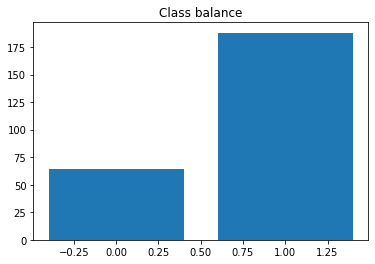

Majority class: 188
Minority class: 64
Proportion: 2.94 : 1


In [80]:
#Data balancing

import matplotlib.pyplot as plt

target_count = original['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Majority class:', target_count[ind_min_class])
print('Minority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

In [81]:
import numpy as np

def multiple_bar_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    x = np.arange(len(xvalues))  # the label locations
    ax.set_xticks(x)
    ax.set_xticklabels(xvalues, fontsize='small')
    if percentage:
        ax.set_ylim(0.0, 1.0)
    width = 0.8  # the width of the bars
    step = width / len(yvalues)
    k = 0
    for name, y in yvalues.items():
        ax.bar(x + k * step, y, step, label=name)
        k += 1
    ax.legend(loc='lower center', ncol=len(yvalues), bbox_to_anchor=(0.5, -0.2), fancybox = True, shadow = True)    

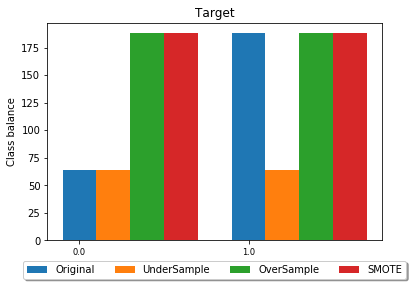

In [82]:

from imblearn.over_sampling import SMOTE, RandomOverSampler

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = original[original['class'] == min_class]
df_class_max = original[original['class'] != min_class] 

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(ratio='minority', random_state=RANDOM_STATE)
y = original.pop('class').values
X = original.values
_, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

plt.figure()

multiple_bar_chart(plt.gca(), 
                        [target_count.index[ind_min_class], target_count.index[1-ind_min_class]], 
                        values, 'Target', 'frequency', 'Class balance')
plt.show()

